## Рабочая тетрадь 4
## Дмитриев Роман Вячеславович, ККСО-04-21

### Задание 1.1.3
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

[0 2 4 3]
[-1.   0.8  3.1  0.1]


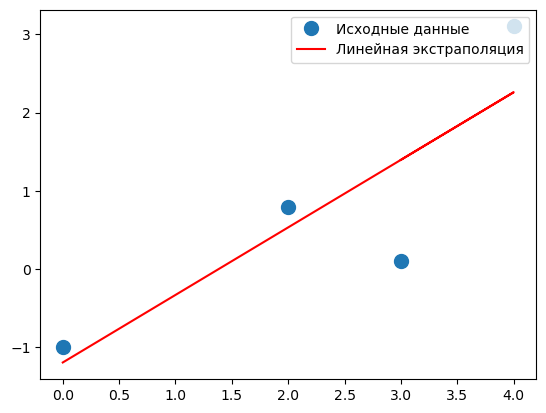

[-8.28662803 -6.61537886 -4.69492227 -3.04627147 -1.44947175 -0.24645149
  1.48407357  3.68096477  5.02135891  5.94829715  7.9682057 ]
[63.68921947 41.0988435  23.02743827 10.64259041  2.6944273  -0.39714587
  2.93530357  9.89910667 22.60721439 40.50606892 64.0483903 ]


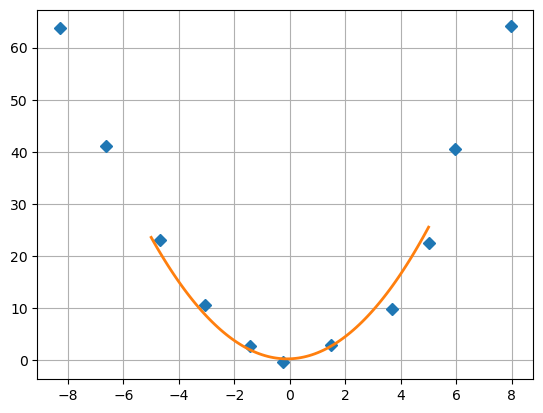

[-8.21195309 -6.66661824 -5.18604496 -3.56265866 -1.95058819 -0.58236942
  1.53785634  2.43495714  4.48155296  6.10772061  7.48805645]
[63.14391264 40.41074518 22.97483565  9.90771659  2.26750396 -0.74641826
  1.89317083 10.06709613 22.87039609 40.38524532 63.96572658]


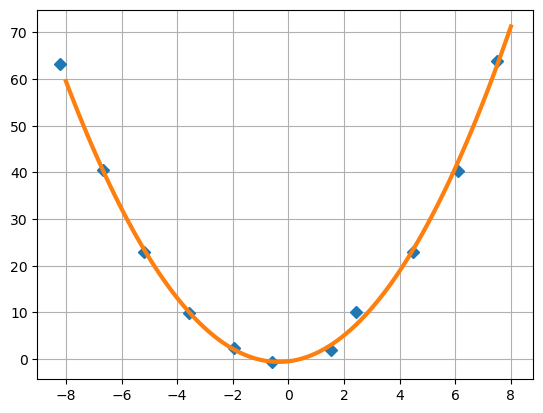

In [43]:
#первая степень
import numpy as np
from matplotlib import pyplot as plt

x = np.array([0, 2, 4, 3])
y = np.array([-1, 0.8, 3.1, 0.1])
print(x)
print(y)
A = np.vstack([x, np.ones(len(x))]).T
A
m, c = np.linalg.lstsq(A, y, rcond = None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend(loc=1)
plt.show()


#вторая степень
import numpy as np
from matplotlib import pyplot as plt
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-8,8,11)
y= x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)
print(x)
print(y)

m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()
plt.show()


#третья степень
import numpy as np
from matplotlib import pyplot as plt
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-8,8,11)
y= x**2+delta*(rand(11)-1)
x += delta*(rand(11)-1)
print(x)
print(y)

m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-8, 8, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**3 +s[1]*x_prec**2+s[2]*x_prec+s[3], '-', lw=3)
plt.grid()
plt.show()


### Задание 1.1.5
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

[1.00579535 0.29622249]
0.00015182740425463475
0.11240125736831558


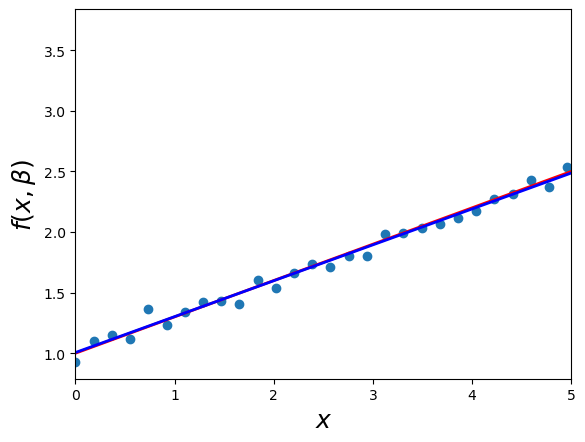

[0.99394753 0.30222843 0.89991067]
0.0001824774617728791
0.08587282595860793


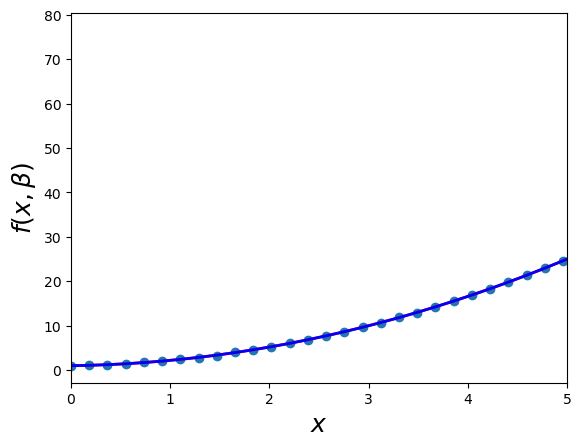

[0.98592987 8.02035555]
0.00013947473302105618
0.1121401693910502


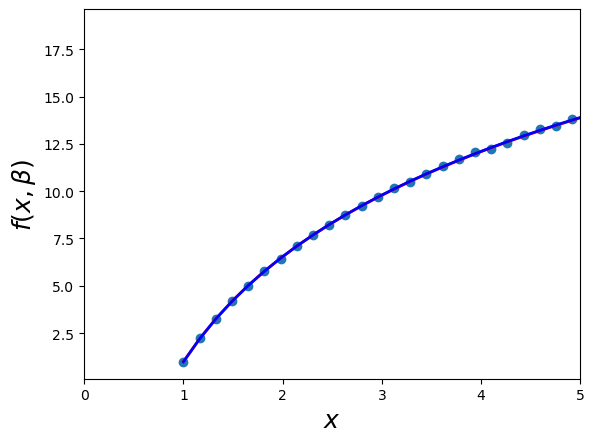

[1.00000004 7.99999998]
1.573559632755352e-16
0.07340112032208024


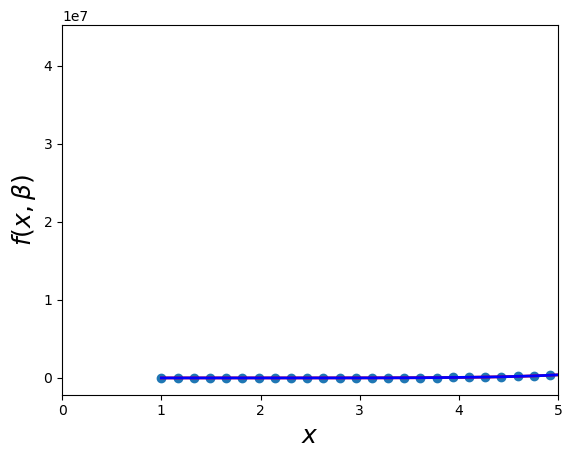

In [15]:
#Первая функция
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
beta = (1, 0.3)
def f(x, b0, b1):
    return b0 + b1 * x
xdata = np.linspace(0, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Вторая функция
beta = (1, 0.3, 0.9)
def f(x, b0, b1, b2):
    return b0 + b1 * x+b2*x*x
xdata = np.linspace(0, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Третья функция
beta = (1, 8)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
xdata = np.linspace(1, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#Четвертая функция
beta = (1, 8)
def f(x, b0, b1):
    return b0* x ** b1
xdata = np.linspace(1, 9, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### Задание 1.2.1
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]

LinearRegression()
26780.09915062817
[9312.57512673]


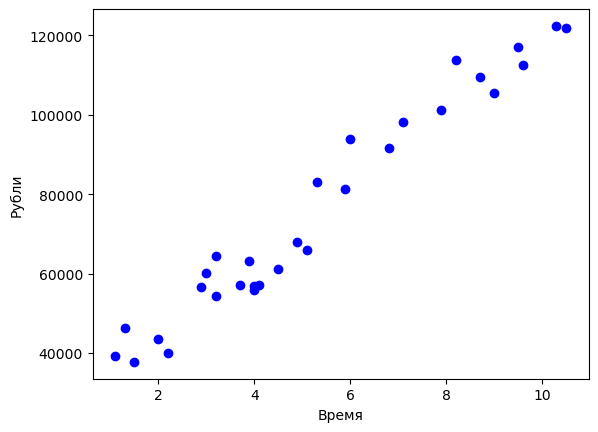

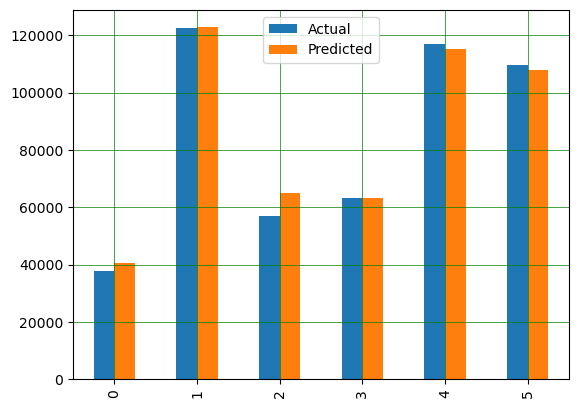

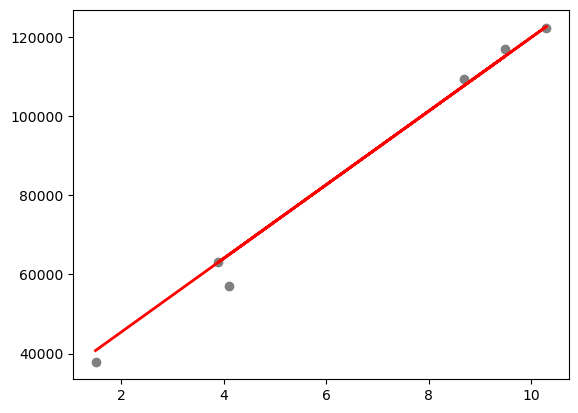

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

my_dict = {'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7,
                               9.0, 9.5, 9.6, 10.3, 10.5],
           'Salary': [39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 81363.00, 93940.00, 91738.00, 98273.00, 101302.00,
                      113812.00, 109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00]
}
dataset = pd.DataFrame(my_dict)
display(dataset.head())
display(dataset.describe())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("\nLinearRegression()")
print(regressor.intercept_)
print(regressor.coef_)
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label='')
plt.xlabel("Время")
plt.ylabel("Рубли")
plt.show()
y_pred = regressor.predict(X_test)
df = pd. DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()



### Задание 1.3.2
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

(48, 5)

LinearRegression()
    Coefficient
x1    -0.000107
x2    -0.000152
x3     0.000211
x4    -0.005058
    Actual  Predicted
29     9.0   7.962130
4      8.0   9.252421
26     8.0   7.763302
30     7.0   7.481077
32     8.0   7.696914
37     7.0   7.003346
34     8.0   8.370428
40     7.0   7.885720
7      8.0   8.646102
10     8.0   7.527290


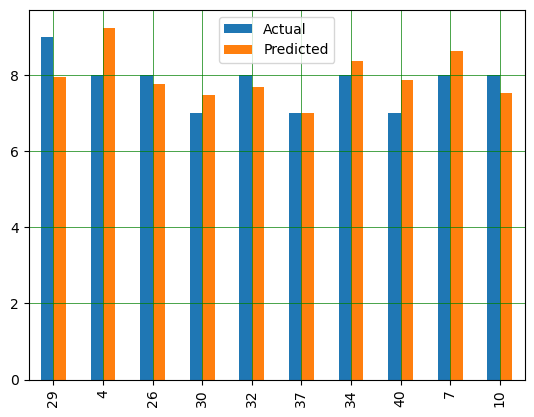

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from distributed import metrics
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = [9.00, 9.00, 9.00, 7.50, 8.00, 10.00, 8.00, 8.00, 8.00, 7.00, 8.00, 7.50, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 7.00, 8.50, 7.00, 8.00, 9.00, 9.00, 8.50,
                               9.00, 8.00, 7.50, 8.00, 9.00, 7.00, 7.00, 8.00, 7.50, 8.00, 6.58, 5.00, 7.00, 8.50,
                               7.00, 7.00, 7.00, 7.00, 7.00, 6.00, 9.00, 7.00, 7.00]
X =  [[3571, 4092,3865, 4870, 4399, 5342, 5319, 5126, 4447,  4512, 4391, 5126, 4817, 4207, 4332, 4318,
      4206, 3718, 4716, 4341, 4593, 4983, 4897, 4258, 4574, 3721, 3448, 3846, 4188, 3601, 3640, 3333, 3063, 3357, 3528, 3802,
      4045, 3897, 3635, 4345, 4449, 3656, 4300, 3745, 5215, 4476, 4296, 5002],
     [1976, 1250, 1586, 2351, 431, 1333, 11868, 2138, 8577, 8507, 5939, 14186, 6930, 6580, 8159, 10340, 8508, 4725, 5915,
      6010, 7834, 602, 2449, 4686, 2619, 4746, 5399, 9061, 5975, 4650, 6905, 6594, 6524, 4121, 3495, 7834, 17782, 6385,
      3274, 3905, 4639, 3985, 3635, 2611, 2302, 3942, 4083, 9794],
     [5250, 5720, 5800, 5290, 5440, 5710, 4510, 5530, 5290, 5520, 5300, 5250, 5740, 5450, 6080, 5860, 5720, 5400, 7240,
      6770, 6630, 6020, 5110, 5170, 5510, 5440, 5480, 5790, 5630, 4930, 5180, 5130, 5780, 5470, 4870, 6290, 5660, 5860,
      6630, 6720, 6260, 5630, 6030, 5080, 6720, 5710, 6230, 5930],
     [541, 524, 561, 414, 410, 457, 344, 467, 464, 498, 580, 471, 525, 508, 566, 635, 603, 714, 865, 640, 649, 540, 464,
      547, 460, 566, 577, 631, 574, 534, 571, 554, 577, 628, 487, 644, 640, 704, 648, 968, 587, 699, 632, 591, 782, 510,
      610, 524]]
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns= {0:'y'}, inplace= False)
df2 = df2.rename(columns={0:'x1', 1:'x2', 2:'x3', 3:'x4'}, inplace=False)
frames=[df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()
print(dataset.shape)
dataset.describe()
X= dataset[['x1', 'x2', 'x3', 'x4']]
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("\nLinearRegression()")
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)
y_pred = regressor.predict(X_test)
y_pred = regressor.predict(X_test)
df = pd. DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()